In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50                                # Número de puntos en cada dirección
x_inicio, x_fin = -2.0, 2.0            # fronteras en la dirección x
y_inicio, y_fin = -1.0, 1.0            # fronteras en la dirección x
x = numpy.linspace(x_inicio, x_fin, N)    # computa un arreglo de una dimensión para x
y = numpy.linspace(y_inicio, y_fin, N)    # computa un arreglo de una dimensión para y
X, Y = numpy.meshgrid(x, y) 

In [3]:
gamma = 5.0 # Fuerza del vórtice
x_vortice, y_vortice = 0.0, 0.0    # localización del vórtice

In [10]:
# Esta función retorna el campo de velocidad generado por el vórtice
# xv y yx son las coordenadas del vórtice (tipo float)
# X y Y son el conjunto de puntos (malla)
# retorna u y v, que son el componente en x y en y respectivamente del campo
def obtener_velocidad_vortice(fuerza, xv, yv, X, Y):
    u = + fuerza/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - fuerza/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [9]:
# Esta función retorna la función corriente generada por el vórtice
# Mismos parámetros que la función anterior
# Retorna psi, un arreglo 2D que es la función corriente
def obtener_funcion_corriente_vortice(fuerza, xv, yv, X, Y):
    psi = fuerza/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

In [11]:
#Ahora se llaman las funciones con los parámetros que definimos antes
u_vortice, v_vortice = obtener_velocidad_vortice(gamma, x_vortice, y_vortice, X, Y)

psi_vortice = obtener_funcion_corriente_vortice(gamma, x_vortice, y_vortice, X, Y)

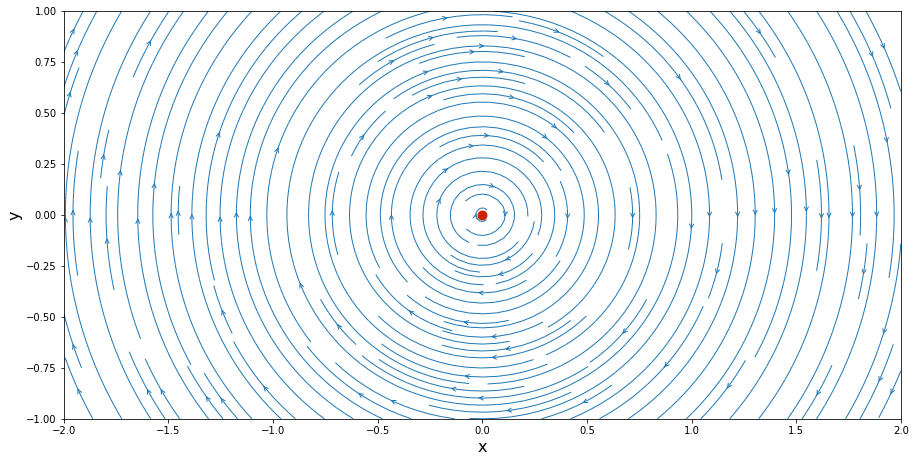

In [15]:
# Ahora podemos visualizar las líneas de flujo del vórtice
tamaño = 15
pyplot.figure(figsize=(tamaño, (y_fin-y_inicio)/(x_fin-x_inicio)*tamaño))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_inicio, x_fin)
pyplot.ylim(y_inicio, y_fin)
pyplot.streamplot(X, Y, u_vortice, v_vortice, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortice, y_vortice, color='#CD2305', s=80, marker='o');